<a href="https://colab.research.google.com/github/muradmy00/Dataset_in_ML/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load dataset  # Upload your dataset (e.g., dataset.csv)

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/ai code/survey lung cancer.csv')
data  # Preview the dataset


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [7]:


# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values or drop rows with missing data
data.dropna(inplace=True)  # Dropping rows with missing data


Missing values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


Missing values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 n

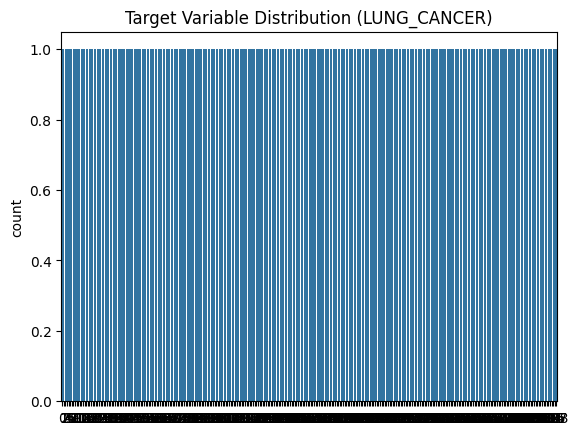

In [18]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Encode categorical variables if needed
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
le = LabelEncoder() # Instantiate LabelEncoder
data['GENDER'] = le.fit_transform(data['GENDER'])  # Encode GENDER (M/F)
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)  # Encode target variable (YES/NO)

# Check dataset info
data.info()

# Check target variable distribution
sns.countplot(data['LUNG_CANCER'])
plt.title("Target Variable Distribution (LUNG_CANCER)")
plt.show()

In [19]:
# Split features (X) and target (y)
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training size: {X_train.shape}")
print(f"Testing size: {X_test.shape}")


Training size: (247, 15)
Testing size: (62, 15)


In [20]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


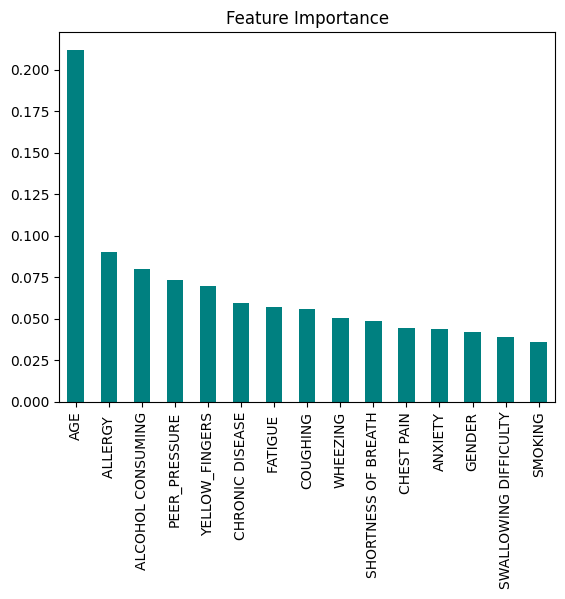

In [21]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance", color='teal')
plt.show()


Accuracy: 0.9193548387096774
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0.83        62
weighted avg       0.92      0.92      0.92        62



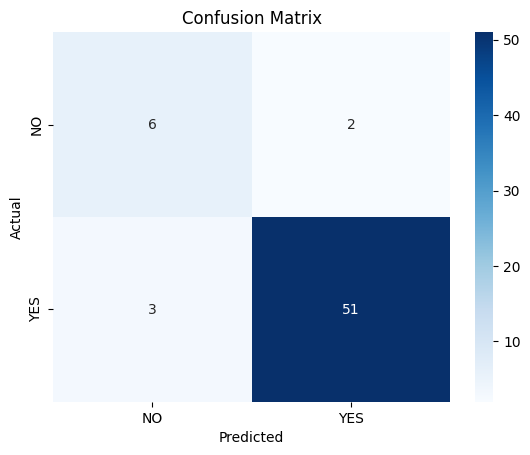

In [22]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Parameters:\n", grid_search.best_params_)
best_model = grid_search.best_estimator


Best Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


Tuned Accuracy: 0.8548387096774194
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62



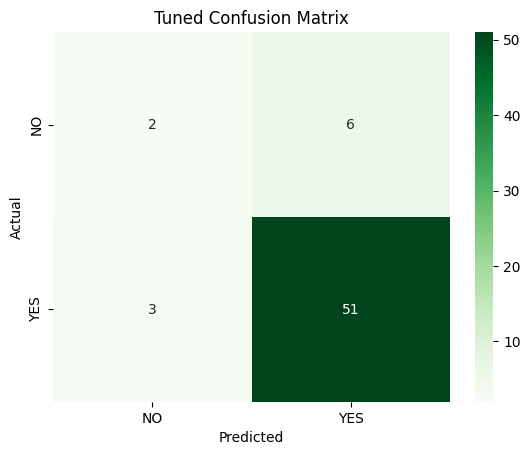

In [24]:
# Make predictions with tuned model
y_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate performance
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Tuned Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
# Single row data
input_data = pd.DataFrame({
    'GENDER': ['M'],  # Categorical value
    'AGE': [65],      # Numerical value
    'SMOKING': [2],
    'YELLOW_FINGERS': [1],
    'ANXIETY': [1],
    'PEER_PRESSURE': [2],
    'CHRONIC DISEASE': [1],
    'FATIGUE ': [2],  # Keep the trailing whitespace to match the original data
    'ALLERGY ': [2],  # Keep the trailing whitespace to match the original data
    'WHEEZING': [2],
    'ALCOHOL CONSUMING': [2],
    'COUGHING': [1],
    'SHORTNESS OF BREATH': [2],
    'SWALLOWING DIFFICULTY': [1],
    'CHEST PAIN': [2]
})

# Encode categorical column
input_data['GENDER'] = le.transform(input_data['GENDER'])  # Ensure encoder matches training

# No need to rename columns, keep the original names with trailing whitespaces

# Scale the numerical data
input_scaled = scaler.transform(input_data)

In [28]:
# Predict the outcome
prediction = best_model.predict(input_scaled)

# Interpret the result
prediction_label = 'YES' if prediction[0] == 1 else 'NO'
print("Prediction for the given input:", prediction_label)


Prediction for the given input: YES


In [31]:
# Sample input data for multiple rows
multiple_data = pd.DataFrame({
    'GENDER': ['M', 'F', 'M','M'],  # Categorical value
    'AGE': [65, 45, 52, 44],        # Numerical value
    'SMOKING': [2, 1, 2, 2],
    'YELLOW_FINGERS': [1, 0, 1, 1],
    'ANXIETY': [1, 0, 2, 2],
    'PEER_PRESSURE': [2, 1, 2, 1],
    'CHRONIC DISEASE': [1, 0, 1, 1],
    'FATIGUE ': [2, 1, 2 , 2],  # Keep the trailing whitespace
    'ALLERGY ': [2, 0, 1, 2],  # Keep the trailing whitespace
    'WHEEZING': [2, 1, 2, 2],
    'ALCOHOL CONSUMING': [2, 1, 2, 2],
    'COUGHING': [1, 1, 0, 2],
    'SHORTNESS OF BREATH': [2, 0, 1, 2],
    'SWALLOWING DIFFICULTY': [1, 0, 2, 2],
    'CHEST PAIN': [2, 0, 1, 2]
})

# Encode categorical column
multiple_data['GENDER'] = le.transform(multiple_data['GENDER'])  # Match encoder with training

# Scale the numerical data
multiple_scaled = scaler.transform(multiple_data)

# Output the scaled data
print(multiple_scaled)


[[ 0.96420304  0.25874093  0.90342486 -1.13447655 -0.93338744  1.01222041
  -0.97205035  0.65402268  0.83871823  0.84574096  0.86704847 -1.29799176
   0.73739406 -0.90342486  0.87423436]
 [-1.03712596 -2.30788594 -1.10689892 -3.15041689 -2.93814135 -0.98792712
  -2.972854   -1.52899897 -3.22330929 -1.18239513 -1.15333806 -1.29799176
  -3.44964807 -2.91374863 -3.16195044]
 [ 0.96420304 -1.40956653  0.90342486 -1.13447655  1.07136646  1.01222041
  -0.97205035  0.65402268 -1.19229553  0.84574096  0.86704847 -3.36640444
  -1.35612701  1.10689892 -1.14385804]
 [ 0.96420304 -2.43621728  0.90342486 -1.13447655  1.07136646 -0.98792712
  -0.97205035  0.65402268  0.83871823  0.84574096  0.86704847  0.77042092
   0.73739406  1.10689892  0.87423436]]


In [32]:
# Predict outcomes for multiple inputs
predictions = best_model.predict(multiple_scaled)

# Interpret the results
prediction_labels = ['YES' if pred == 1 else 'NO' for pred in predictions]

# Display predictions
for i, label in enumerate(prediction_labels):
    print(f"Prediction for input row {i + 1}: {label}")


Prediction for input row 1: YES
Prediction for input row 2: NO
Prediction for input row 3: YES
Prediction for input row 4: YES
